In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(1600, 1200, 3)
(1500, 1000, 3)


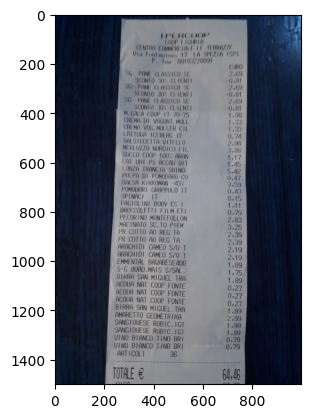

In [2]:
img_src="./bill.jpg"
img=cv2.imread(img_src)
print(img.shape)

img=cv2.resize(img,(1000,1500))

#bgr format to RGB
print(img.shape)

plt.imshow(img)
plt.show()



remove the noice  

edge detection

contour extraction

best contor selection

project to the screen

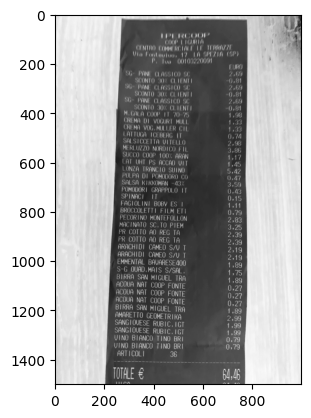

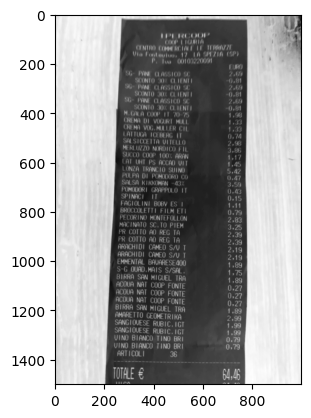

In [3]:
# remove the noice

#image bluring

orig=img.copy()
gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='binary')
plt.show()

blured=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blured, cmap='binary')
plt.show()

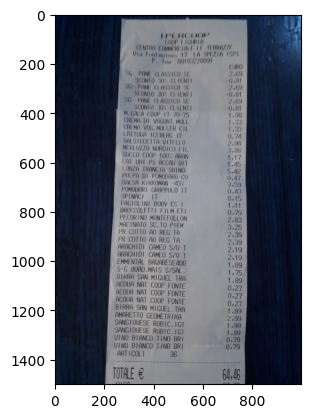

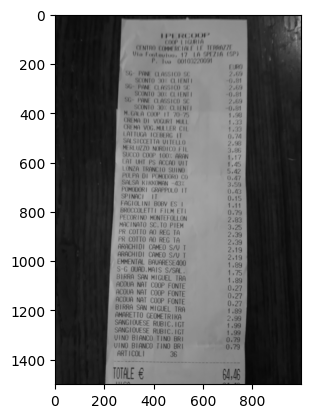

In [4]:
regen=cv2.cvtColor(blured,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()


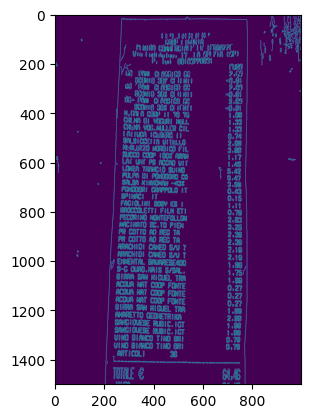

(1500, 1000)

In [5]:
# edge detection

edge=cv2.Canny(blured,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.show()
edge.shape

In [6]:
# Countors extraction

contours,_=cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours=sorted(contours,reverse=True,key=cv2.contourArea)

2727


In [7]:
# select best contours region

for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.01*p,True)

    if len(approx)==4:
       target=approx
       break

print(target.shape)

(4, 1, 2)


In [8]:
#reorder target contor

def reorder(h):
    h=h.reshape((4,2))
    print(h)

    hnew=np.zeros((4,2),dtype=np.float32)

    add=h.sum(axis=1)
    hnew[3]=h[np.argmax(add)]
    hnew[1]=h[np.argmin(add)]

    diff =np.diff(h,axis=1)
    hnew[0]=h[np.argmax(diff)]
    hnew[2]=h[np.argmin(diff)]

    return hnew



In [9]:
reorder=reorder(target)
print("\n")
print(reorder)

[[ 496 1410]
 [ 496 1413]
 [ 506 1413]
 [ 506 1410]]


[[ 496. 1413.]
 [ 496. 1410.]
 [ 506. 1410.]
 [ 506. 1413.]]


In [46]:
# project to a fixed screen

input_rep=reorder
output_map=np.float32([[0,0],[400,0],[400,400],[0,400]])

In [47]:
M=cv2.getPerspectiveTransform(input_rep,output_map)

ans=cv2.warpPerspective(orig,M,(400,400))



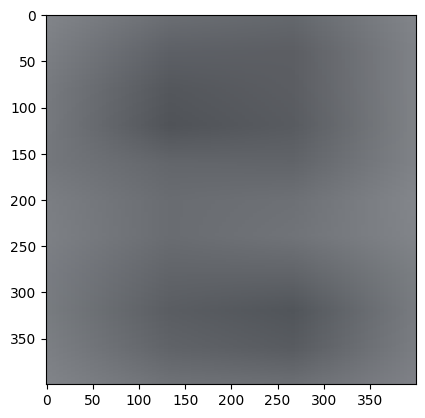

In [48]:
plt.imshow(ans)
plt.show()

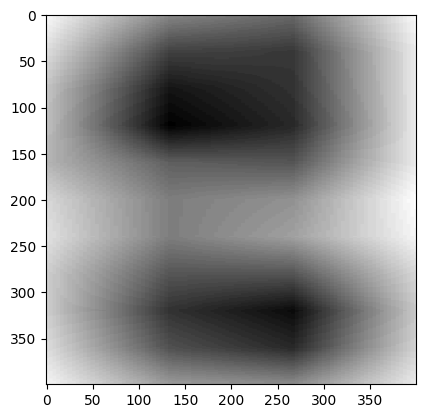

In [49]:
res=cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)
plt.imshow(res,cmap='gray')
plt.show()